首先导入一些必要的库
- mnist: Keras库中包含的一个方便我们下载MNIST数据集的类
- pyplot: Python中常用的画图工具matplotlib的画图类
- numpy: Python中用于处理各种数值计算的库

In [1]:
# 如果没有安装 keras 和 tensorflow 库
# 请使用 pip install keras tensorflow 安装

from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


使用Keras的mnist模块下载MNIST数据集，数据集已经被分为训练数据与测试数据，分别包含了输入x（即图像）和输出y（即对应的数字）。我们将四个数据集的形状打印出来。

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


从x_train和y_train的形状可以看到训练数据中包含了60000个数据点。其中输入x是60000张28\*28=784像素组成的图像。由于MNIST数据集是灰度图，所以每个像素仅由一个数字表示。输出y是60000个数字，代表了每一张图像对应的是数字几。测试数据x_test和y_test中则包含了10000个数据点。
我们将训练数据中的前十张图像画出来。（有关matplotlib库的详细用法在本书中不作展开，感兴趣的同学可以搜索相关教程。）

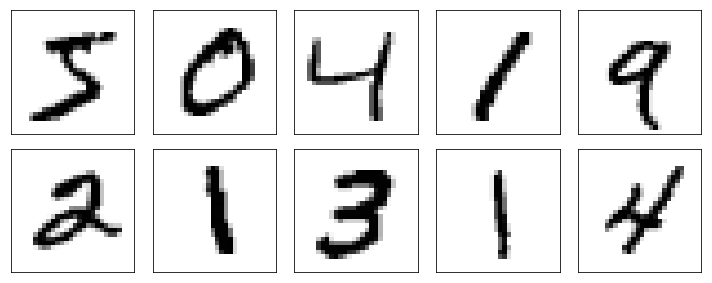

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) # 新建一个包含10张子图2行5列的画布
axes = axes.flatten() # axes中存储了每一个子图
for i in range(10): # 循环10次（画10张图）
    axes[i].imshow(x_train[i], cmap="gray_r") # 将x_train的第i张图画在第i个子图上，这里我们用cmap="gray_r"即反灰度图，数字越大颜色越黑，数字越小颜色越白 
    axes[i].set_xticks([]) # 移除图像的x轴刻度
    axes[i].set_yticks([]) # 移除图像的y轴刻度
plt.tight_layout() # 采用更紧凑美观的布局方式
plt.show() # 显示图片

接下来对于0到9每一个数字，我们使用下列代码画出10张对应的手写数字图片。

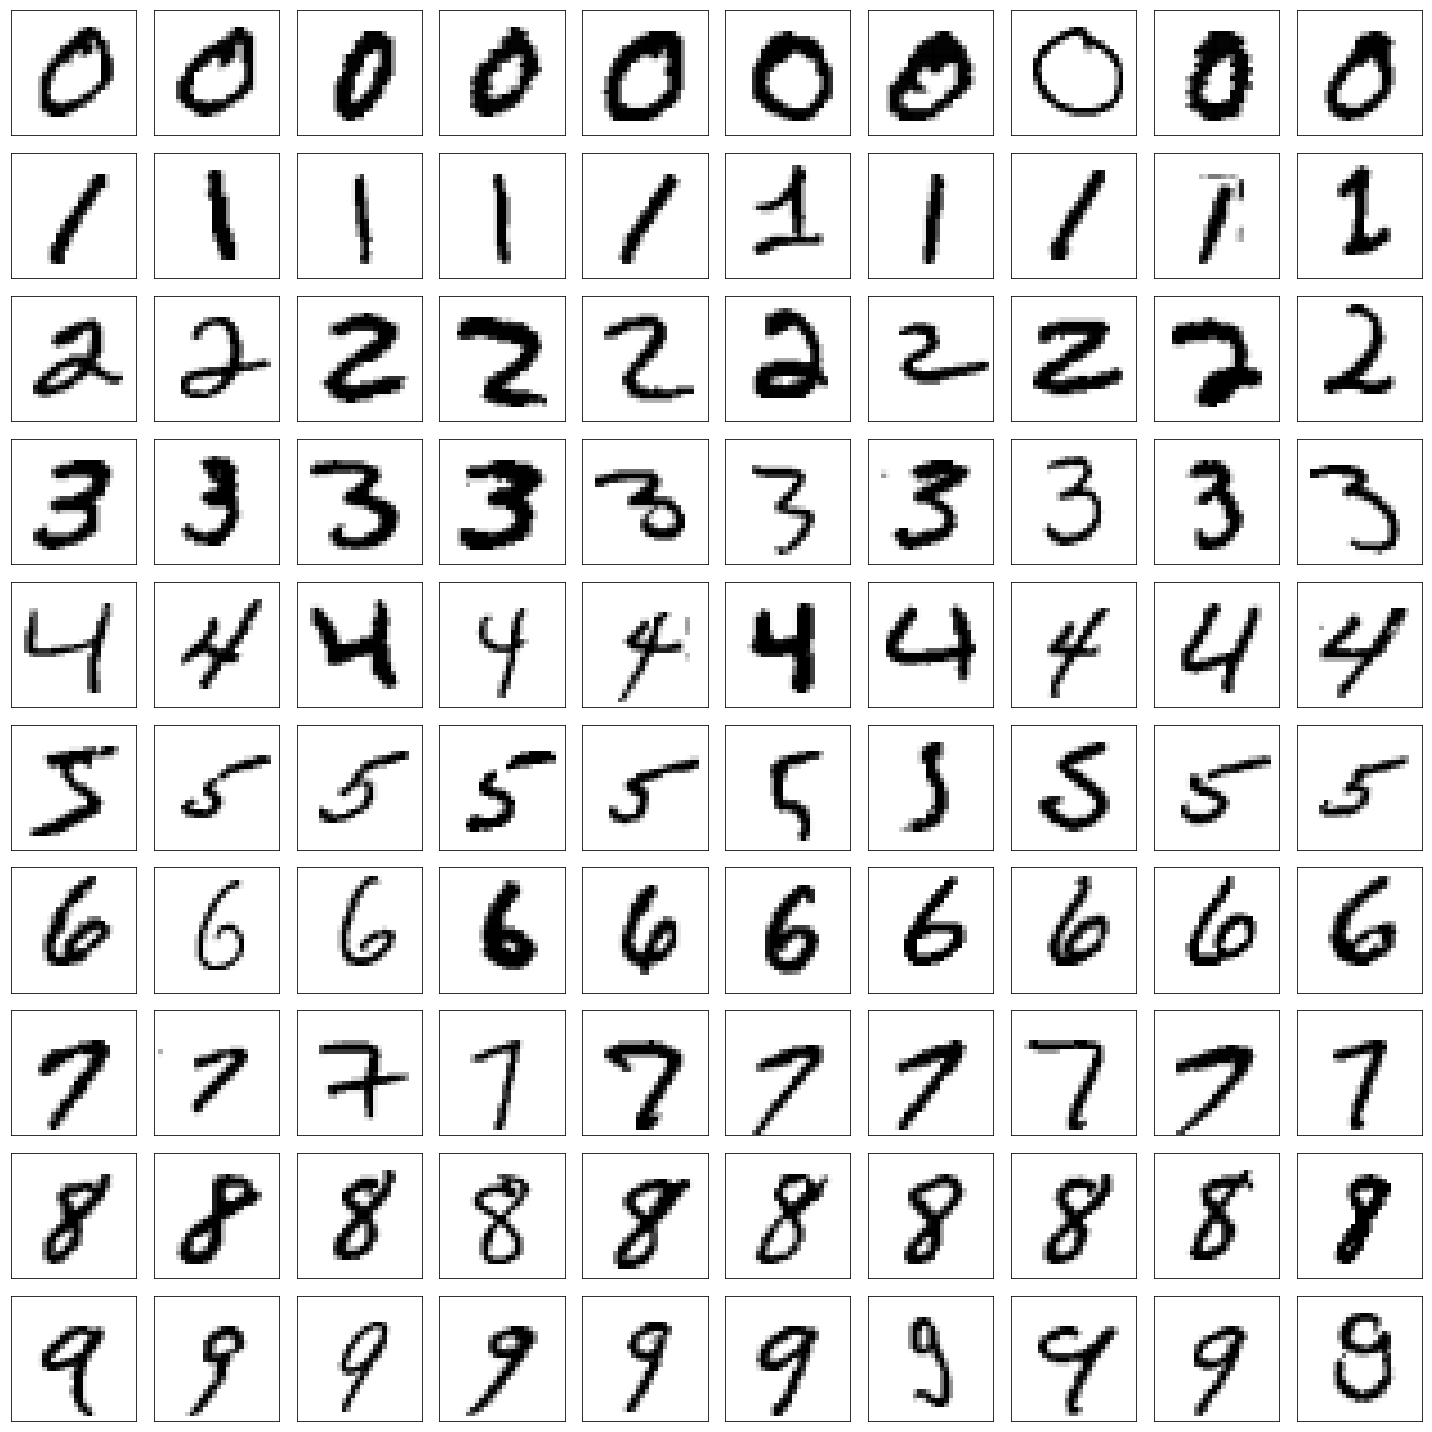

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20)) # 新建一个包含100张子图的10行10列的画布
for i in range(10): # 对于每一个数字i
    indice = np.where(y_train == i)[0] # 找到标签为数字i的图像下标
    for j in range(10): # 输出前10张图片
        axes[i][j].imshow(x_train[indice[j]], cmap="gray_r")
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
plt.tight_layout()
plt.show()

可以看到MNIST数据集中包含了笔画轻重各异、书写风格不同的图片。数据集中的数据多样性很重要，计算机“见过”的数据越多，分类就越准确。直观上理解，若计算机“见过”的都是右撇子写的数字，这时新来了一张图片是由左撇子书写的，因为左撇子写的数字与右撇子会有一些差异，那么它大概率会识别错误；反之如果计算机曾经“见过”左撇子写的数字，它识别正确的可能性就会提升。